# A Linear Model for MNIST classification

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

In [2]:
minst = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
print (minst.train.images.shape)
print (minst.train.labels.shape)

(55000, 784)
(55000, 10)


In [7]:
print (minst.test.images.shape)
print (minst.test.labels.shape)

(10000, 784)
(10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


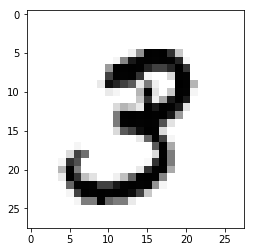

In [8]:
example_image = minst.train.images[1]
example_image_reshaped = example_image.reshape((28,28))
example_label = minst.train.labels[1]

print(example_label)
plt.imshow(example_image_reshaped)

In [9]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [12]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
for i in range(1000):
    batch_xs, batch_ys = minst.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [17]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: minst.test.images, y_: minst.test.labels}))

0.9159
